In [17]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1" #model will be trained on GPU 1

In [33]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D,Cropping2D
from keras.models import Model
from keras.optimizers import RMSprop
import cv2

In [19]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pylab as plb
from PIL import Image, ImageFilter

import sklearn
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation

from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, AveragePooling2D
from keras import backend as K
from keras.callbacks import TensorBoard

import tensorflow as tf
#tf.enable_eager_execution()

In [20]:
# def extract_data(filename, num_images):
#    with gzip.open(filename) as bytestream:
#        bytestream.read(16)
#        buf = bytestream.read(28 * 28 * num_images)
#        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
#        data = data.reshape(num_images, 28,28)
#        return data


In [21]:
# train_data = extract_data('train-images-idx3-ubyte.gz', 60000)
# test_data = extract_data('t10k-images-idx3-ubyte.gz', 10000)

In [22]:
# def extract_labels(filename, num_images):
#    with gzip.open(filename) as bytestream:
#        bytestream.read(8)
#        buf = bytestream.read(1 * num_images)
#        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
#        return labels

In [23]:
# train_labels = extract_labels('train-labels-idx1-ubyte.gz',60000)
# test_labels = extract_labels('t10k-labels-idx1-ubyte.gz',10000)

In [24]:
## Shapes of training set
# print("Training set (images) shape: {shape}".format(shape=train_data.shape))

## Shapes of test set
# print("Test set (images) shape: {shape}".format(shape=test_data.shape))

In [25]:
## Create dictionary of target classes
# label_dict = {
 # 0: 'A',
 # 1: 'B',
 # 2: 'C',
 # 3: 'D',
 # 4: 'E',
 # 5: 'F',
 # 6: 'G',
 # 7: 'H',
 # 8: 'I',
 # 9: 'J',
# }

In [ ]:
currentDir = os.getcwd()
datasetDir = currentDir + "\\FilteredImages2\\"
# datasetDir = currentDir + "/FilteredImages2/" # NEW SINGLE IMAGES DIRECTORY
trainDir = os.path.join(datasetDir, "train")
testDir = os.path.join(datasetDir, "test")
validDir = os.path.join(datasetDir, "valid")
y_dataDir = os.path.join(datasetDir, "y_data")

In [27]:
def sortFirst(val):
    return val[0]

def getBinary(dataFile):
    listOfTraining = []
    trainingHeader = []
    with open(dataFile) as csvfile:
#     reader = csv.DictReader(csvfile)
        reader2 = csv.reader(csvfile)
        listOfTraining = list(reader2)
        trainingHeader = listOfTraining[0]
        listOfTraining.pop(0)
#         listOfTraining = listOfTraining.sort(key = sortFirst, reverse = False)
#         np.asarray(listofTraining, dtype=np.int32)
#         return np.asarray(listofTraining, dtype=np.int32)
    listOfTrainingBinary = []
    for item in listOfTraining:
        listOfTrainingBinary.append(item[1])
    return np.asarray(listOfTrainingBinary, dtype=np.int32)

In [28]:
y_train = []
y_trainDir = os.path.join(y_dataDir, 'train_split_Depression_AVEC2017-edited.csv')
# print(y_trainDir)
y_train = getBinary(y_trainDir)
y_testDir = os.path.join(y_dataDir, 'dev_split_Depression_AVEC2017.csv')
# print(y_testDir)
y_test = getBinary(y_testDir)
print(y_train)
print(y_test)

# Y_train = np.asarray(y_train, dtype=np.int32)

[0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0]


In [29]:
x_trainDir = trainDir
x_testDir = testDir

In [30]:
x_trainDir

'C:\\Users\\hong ray\\Desktop\\FYP\\Aaron-Workspace\\FilteredImages2\\train'

In [34]:
# testSet = []
# testFolders =[]
# # trainingSet = []
# trainingFolders = []
# x_train = []
# y_train = []

def getImagesDir(mainDirectory):
    ImgDict = {}
    ImgList = []
    
    for folder in os.listdir(mainDirectory):
        theDir = os.path.join(mainDirectory, folder)
        images = os.listdir(theDir)
        listOfImgDir = []
        for img in images:
#             listOfImgDir.append(Image.open(os.path.join(theDir, img)))
            listOfImgDir.append(os.path.join(theDir, img))
#         print(listOfImgDir)
#         print(images)
        folderName = folder.split('_')
        ImgDict[folderName[0]] = listOfImgDir
        ImgList.append(listOfImgDir)
    imgList = ImgList.sort(key = sortFirst, reverse = False)
    return ImgList

trainingImagesDir = getImagesDir(trainDir)
print(testDir)
testImagesDir = getImagesDir(testDir)

C:\Users\hong ray\Desktop\FYP\Aaron-Workspace\FilteredImages2\test


In [36]:
def importImages(listOfImgDir):
    myFolder = []
    for folder in listOfImgDir:
        myImages = []
        for image in folder:
            #myImages.append(np.array(Image.open(image)))
            img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
            crop_img = img[0:101, 0:100]
            #cv2.imshow("image", img)
            myImages.append(np.array(crop_img))
        myFolder.append(np.array(myImages))
    return myFolder

#First Array iterate through Folder, Second Array Iterate though Image in Folder
trainingImages = importImages(trainingImagesDir)
testImages = importImages(testImagesDir)

In [37]:
#Num of Img, Height, Width
print(len(trainingImages)) 

len(y_train)

107


107

In [38]:
trainingImagesNP = np.array(trainingImages)
testImagesNP = np.array(testImages)

In [39]:
## Shapes of training set
print("Training set (images) shape: {shape}".format(shape=trainingImagesNP.shape))

## Shapes of test set
print("Test set (images) shape: {shape}".format(shape=testImagesNP.shape))

Training set (images) shape: (107, 1, 101, 100)
Test set (images) shape: (35, 1, 101, 100)


In [40]:
# print(trainingImages.shape)
# print(trainingImages[0])
# print(trainingImagesNP[10].shape)
# print(y_train)

neg = []
y_neg = []
pos = []
y_pos = []

for x,y in zip(trainingImages, y_train):
    if (y == 0):
        for each in x:
            neg.append(each)
            y_neg.append(0)
    else:
        for each in x:
            pos.append(each)
            y_pos.append(1)

X = pos + neg
Y = y_pos + y_neg

In [42]:
neg_test = []
y_neg_test = []
pos_test = []
y_pos_test = []

for x,y in zip(testImages, y_train):
    if (y == 0):
        for each in x:
            neg_test.append(each)
            y_neg_test.append(0)
    else:
        for each in x:
            pos_test.append(each)
            y_pos_test.append(1)

X_test = pos_test + neg_test
Y_test = y_pos_test + y_neg_test

npX_test = np.array(X_test)
npY_test = np.array(Y_test)
newNPX_test = npX_test.reshape(npX_test.shape[0], 101, 100, 1)

In [ ]:
print(newNPX_test.shape)

In [43]:
vImagesDir = getImagesDir(validDir)
vImages = importImages(vImagesDir)
vImagesNP = np.array(vImages)

#TESTING DATA UNSEEN DATA
v = []

for x in vImages:
    for each in x:
        v.append(each)

# X_v = pos_v + neg_v
# Y_v = y_pos_v + y_neg_v

np_v = np.array(v)
newNPX_v = np_v.reshape(np_v.shape[0], 101, 100, 1)

In [44]:
print(newNPX_v.shape)

(47, 101, 100, 1)


In [45]:
npX = np.array(X)
npY = np.array(Y)

# print(npX)
# print(npY)

In [46]:
print(npX.shape)
print(npY.shape)

(107, 101, 100)
(107,)


In [47]:
newNPX = npX.reshape(npX.shape[0], 101, 100, 1)
print(newNPX.shape)

(107, 101, 100, 1)


In [51]:
newNPX = np.resize(newNPX, (npX.shape[0], 100, 100, 1))
print(newNPX.shape)
newNPX_v = np.resize(newNPX_v, (np_v.shape[0], 100, 100, 1))
print(newNPX_v.shape)
newNPX_test = np.resize(newNPX_test, (npX_test.shape[0], 100, 100, 1))
print(newNPX_test.shape)

(107, 100, 100, 1)
(47, 100, 100, 1)
(35, 100, 100, 1)


In [52]:
# plt.figure(figsize=[5,5])

## Display the first image in training data
# plt.subplot(121)
# curr_img = np.reshape(train_data[0], (28,28))
# curr_lbl = train_labels[0]
# plt.imshow(curr_img, cmap='gray')
# plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")

## Display the first image in testing data
# plt.subplot(122)
# curr_img = np.reshape(test_data[0], (28,28))
# curr_lbl = test_labels[0]
# plt.imshow(curr_img, cmap='gray')
# plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")

In [53]:
#plt.figure(figsize=[75, 75])

# Display the first image in training data
#plt.subplot(121)
#curr_img = npX[0]
#plt.imshow(curr_img, cmap='gray')

# Display the first image in testing data
#plt.subplot(122)
#curr_img = np_v[0]
#plt.imshow(curr_img, cmap='gray')

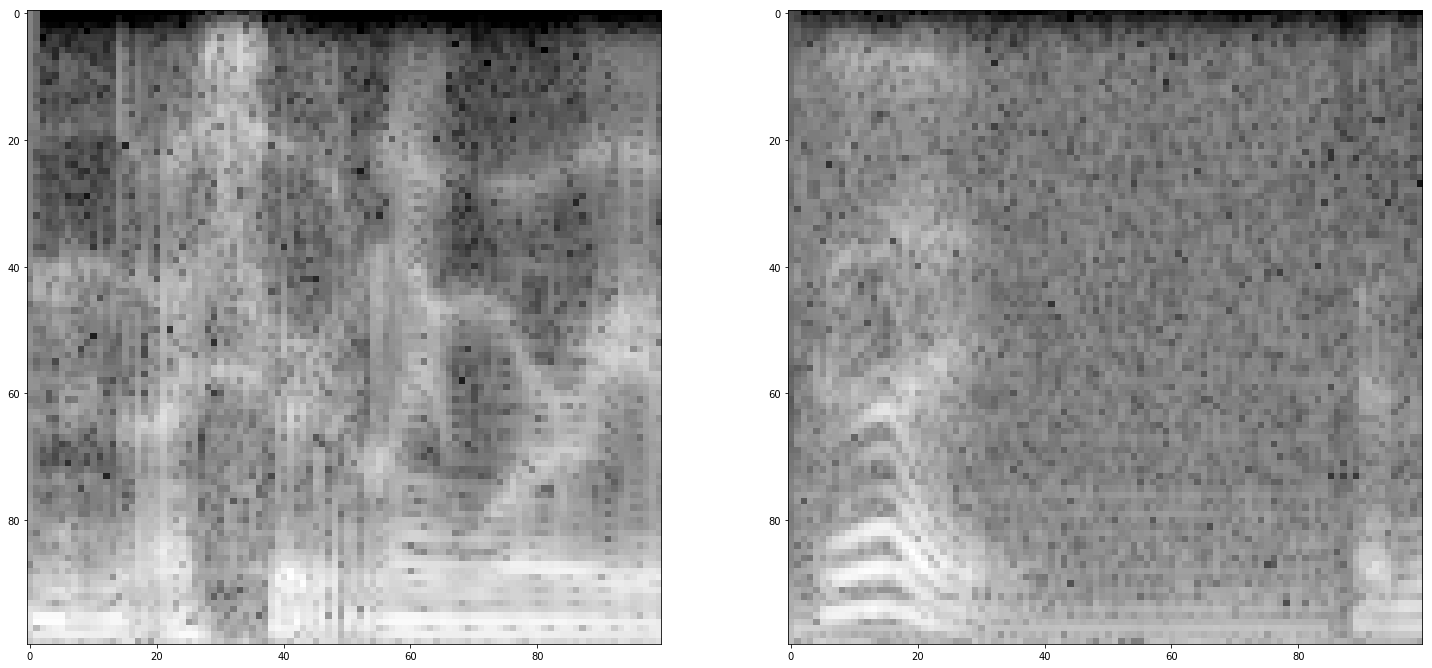

In [87]:
plt.figure(figsize=[25,25])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(newNPX[0], (100,100))
plt.imshow(curr_img, cmap='gray')

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(newNPX_v[0], (100,100))
plt.imshow(curr_img, cmap='gray')

In [56]:
# train_data = train_data.reshape(-1, 28,28, 1)
# test_data = test_data.reshape(-1, 28,28, 1)
# train_data.shape, test_data.shape

In [57]:
# train_data.dtype, test_data.dtype

In [58]:
# np.max(train_data), np.max(test_data)

In [59]:
# train_data = train_data / np.max(train_data)
# test_data = test_data / np.max(test_data)

In [60]:
# np.max(train_data), np.max(test_data)

In [61]:
# from sklearn.model_selection import train_test_split
# train_X,valid_X,train_ground,valid_ground = train_test_split(train_data,
#                                                             train_data, 
#                                                             test_size=0.2, 
#                                                             random_state=13)

In [62]:
# batch_size = 128
# epochs = 50
# inChannel = 1
# x, y = 28, 28
# input_img = Input(shape = (x, y, inChannel))

In [95]:
#Saving Model
from keras.callbacks import ModelCheckpoint
numEpochs = 1000
model_path = os.path.join(currentDir,'AutoencoderTest'+ str(numEpochs) + '.h5')

checkpoint = ModelCheckpoint(model_path, monitor='acc', verbose=1, save_best_only=False, save_weights_only=False, mode='auto')
tbCallBack = TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

callbacks_list = [checkpoint, tbCallBack]

In [96]:
print(newNPX.shape)
print(newNPX_test.shape)
print(newNPX_v.shape)

print(newNPX.dtype)
print(newNPX_test.dtype)
print(newNPX_v.dtype)

np.max(newNPX), np.max(newNPX_test)
newNPX = newNPX / np.max(newNPX)
newNPX_test = newNPX_test / np.max(newNPX_test)

np.max(newNPX), np.max(newNPX_test)

(107, 100, 100, 1)
(35, 100, 100, 1)
(47, 100, 100, 1)
float64
float64
uint8


(1.0, 1.0)

In [97]:
noise_factor = 0.5
x_train_noisy = newNPX + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=newNPX.shape)
x_valid_noisy = newNPX_v + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=newNPX_v.shape)
x_test_noisy = newNPX_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=newNPX_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_valid_noisy = np.clip(x_valid_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

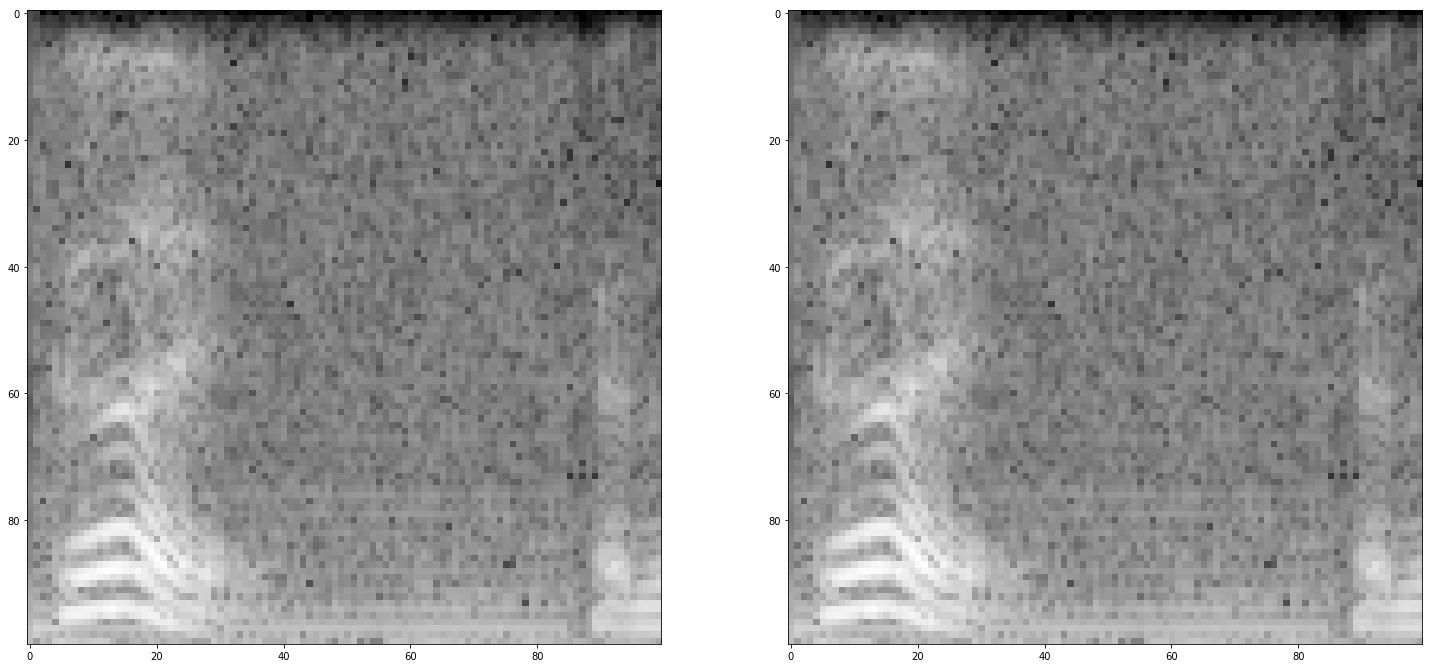

In [98]:
# noisy
plt.figure(figsize=[25,25])

# Display the first image in training data
plt.subplot(121)
curr_img1 = np.reshape(x_train_noisy[1], (100,100))
plt.imshow(curr_img, cmap='gray')

# Display the first image in testing data
plt.subplot(122)
curr_img2 = np.reshape(x_test_noisy[1], (100,100))
plt.imshow(curr_img, cmap='gray')

In [99]:
batch_size = 128
# inChannel = 1
# x, y = 28, 28
# input_img = Input(shape = (x, y, inChannel))

input_img = Input(shape = (100, 100, 1))

In [100]:
def autoencoder(input_img):
    #encoder
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    pool1 = MaxPooling2D(pool_size=(2,2))(conv1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    pool2 = MaxPooling2D(pool_size=(2,2))(conv2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)

    #decoder
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    up1 = UpSampling2D((2,2))(conv4)
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1)
    up2 = UpSampling2D((2,2))(conv5)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2)    
    
    return decoded

In [101]:
autoencoder = Model(input_img, autoencoder(input_img))
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop(), metrics=['accuracy'])
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 100, 100, 1)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 100, 100, 32)      320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 25, 25, 128)       73856     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 25, 25, 128)       147584    
__________

In [ ]:
autoencoder_train = autoencoder.fit(x=x_train_noisy, y=newNPX, batch_size=batch_size,epochs=numEpochs,verbose=1,validation_data=(x_valid_noisy, newNPX_v))

Train on 107 samples, validate on 47 samples
Epoch 1/1000
107/107 [==============================] - 6s 55ms/step - loss: 0.0341 - acc: 0.0042 - val_loss: 2793.5010 - val_acc: 0.0112
Epoch 2/1000
107/107 [==============================] - 6s 52ms/step - loss: 0.1829 - acc: 0.0205 - val_loss: 2750.1150 - val_acc: 0.0112
Epoch 3/1000
107/107 [==============================] - 6s 55ms/step - loss: 0.0296 - acc: 0.0205 - val_loss: 2754.6885 - val_acc: 0.0112
Epoch 4/1000
107/107 [==============================] - 6s 57ms/step - loss: 0.0282 - acc: 0.0205 - val_loss: 2750.9094 - val_acc: 0.0112
Epoch 5/1000
107/107 [==============================] - 6s 57ms/step - loss: 0.0284 - acc: 0.0205 - val_loss: 2755.6667 - val_acc: 0.0112
Epoch 6/1000
107/107 [==============================] - 6s 57ms/step - loss: 0.0295 - acc: 0.0205 - val_loss: 2749.5498 - val_acc: 0.0112
Epoch 7/1000
107/107 [==============================] - 6s 53ms/step - loss: 0.0300 - acc: 0.0205 - val_loss: 2752.4373 - val_a

Epoch 60/1000
107/107 [==============================] - 5s 50ms/step - loss: 0.0138 - acc: 0.0205 - val_loss: 2744.3401 - val_acc: 9.2340e-04
Epoch 61/1000
107/107 [==============================] - 5s 49ms/step - loss: 0.0132 - acc: 0.0205 - val_loss: 2743.7205 - val_acc: 9.2553e-04
Epoch 62/1000
107/107 [==============================] - 5s 50ms/step - loss: 0.0136 - acc: 0.0205 - val_loss: 2741.7576 - val_acc: 8.0638e-04
Epoch 63/1000
107/107 [==============================] - 5s 50ms/step - loss: 0.0192 - acc: 0.0195 - val_loss: 2743.2695 - val_acc: 9.5745e-04
Epoch 64/1000
107/107 [==============================] - 5s 49ms/step - loss: 0.0188 - acc: 0.0205 - val_loss: 2740.4250 - val_acc: 7.9787e-04
Epoch 65/1000
107/107 [==============================] - 5s 49ms/step - loss: 0.0264 - acc: 0.0175 - val_loss: 2744.2529 - val_acc: 9.3617e-04
Epoch 66/1000
107/107 [==============================] - 5s 49ms/step - loss: 0.0152 - acc: 0.0205 - val_loss: 2743.0256 - val_acc: 9.4468e-04

Epoch 118/1000
107/107 [==============================] - 6s 53ms/step - loss: 0.0138 - acc: 0.0205 - val_loss: 2730.2065 - val_acc: 8.0426e-04
Epoch 119/1000
107/107 [==============================] - 5s 50ms/step - loss: 0.0172 - acc: 0.0197 - val_loss: 2741.5623 - val_acc: 0.0022
Epoch 120/1000
107/107 [==============================] - 5s 49ms/step - loss: 0.0106 - acc: 0.0205 - val_loss: 2738.5129 - val_acc: 0.0011
Epoch 121/1000
107/107 [==============================] - 5s 49ms/step - loss: 0.0092 - acc: 0.0204 - val_loss: 2735.5632 - val_acc: 8.9574e-04
Epoch 122/1000
107/107 [==============================] - 5s 49ms/step - loss: 0.0087 - acc: 0.0204 - val_loss: 2732.2686 - val_acc: 8.1064e-04
Epoch 123/1000
107/107 [==============================] - 5s 51ms/step - loss: 0.0085 - acc: 0.0204 - val_loss: 2731.2490 - val_acc: 8.1702e-04
Epoch 124/1000
107/107 [==============================] - 5s 51ms/step - loss: 0.0088 - acc: 0.0205 - val_loss: 2725.4436 - val_acc: 8.0000e-04


Epoch 176/1000
107/107 [==============================] - 6s 54ms/step - loss: 0.0097 - acc: 0.0205 - val_loss: 2728.3931 - val_acc: 8.0638e-04
Epoch 177/1000
107/107 [==============================] - 6s 53ms/step - loss: 0.0093 - acc: 0.0202 - val_loss: 2728.3848 - val_acc: 0.0010
Epoch 178/1000
107/107 [==============================] - 6s 53ms/step - loss: 0.0086 - acc: 0.0204 - val_loss: 2723.3596 - val_acc: 7.9574e-04
Epoch 179/1000
107/107 [==============================] - 6s 53ms/step - loss: 0.0104 - acc: 0.0202 - val_loss: 2730.8784 - val_acc: 0.0012
Epoch 180/1000
107/107 [==============================] - 5s 50ms/step - loss: 0.0103 - acc: 0.0205 - val_loss: 2723.8025 - val_acc: 7.9574e-04
Epoch 181/1000
107/107 [==============================] - 6s 52ms/step - loss: 0.0127 - acc: 0.0202 - val_loss: 2733.7732 - val_acc: 0.0016
Epoch 182/1000
107/107 [==============================] - 6s 57ms/step - loss: 0.0092 - acc: 0.0205 - val_loss: 2727.9001 - val_acc: 8.2340e-04
Epoc

Epoch 234/1000
107/107 [==============================] - 6s 52ms/step - loss: 0.0090 - acc: 0.0204 - val_loss: 2720.6406 - val_acc: 7.9574e-04
Epoch 235/1000
107/107 [==============================] - 6s 53ms/step - loss: 0.0112 - acc: 0.0203 - val_loss: 2733.7078 - val_acc: 0.0020
Epoch 236/1000
107/107 [==============================] - 6s 54ms/step - loss: 0.0091 - acc: 0.0204 - val_loss: 2727.1365 - val_acc: 8.7660e-04
Epoch 237/1000
107/107 [==============================] - 6s 54ms/step - loss: 0.0084 - acc: 0.0204 - val_loss: 2725.8242 - val_acc: 0.0015
Epoch 238/1000
107/107 [==============================] - 6s 53ms/step - loss: 0.0076 - acc: 0.0204 - val_loss: 2721.8931 - val_acc: 7.9574e-04
Epoch 239/1000
107/107 [==============================] - 6s 52ms/step - loss: 0.0088 - acc: 0.0203 - val_loss: 2726.5684 - val_acc: 0.0017
Epoch 240/1000
107/107 [==============================] - 5s 51ms/step - loss: 0.0088 - acc: 0.0204 - val_loss: 2718.9836 - val_acc: 7.9574e-04
Epoc

Epoch 292/1000
107/107 [==============================] - 5s 51ms/step - loss: 0.0078 - acc: 0.0205 - val_loss: 2720.2627 - val_acc: 7.9574e-04
Epoch 293/1000
107/107 [==============================] - 5s 51ms/step - loss: 0.0084 - acc: 0.0204 - val_loss: 2726.8132 - val_acc: 0.0022
Epoch 294/1000
107/107 [==============================] - 5s 51ms/step - loss: 0.0079 - acc: 0.0204 - val_loss: 2718.9749 - val_acc: 8.4681e-04
Epoch 295/1000
107/107 [==============================] - 5s 51ms/step - loss: 0.0089 - acc: 0.0203 - val_loss: 2731.6689 - val_acc: 0.0018
Epoch 296/1000
107/107 [==============================] - 5s 51ms/step - loss: 0.0086 - acc: 0.0204 - val_loss: 2723.5698 - val_acc: 9.8936e-04
Epoch 297/1000
107/107 [==============================] - 5s 51ms/step - loss: 0.0081 - acc: 0.0204 - val_loss: 2727.0981 - val_acc: 0.0018
Epoch 298/1000
107/107 [==============================] - 5s 51ms/step - loss: 0.0073 - acc: 0.0204 - val_loss: 2720.2627 - val_acc: 8.2340e-04
Epoc

Epoch 350/1000
107/107 [==============================] - 6s 52ms/step - loss: 0.0074 - acc: 0.0205 - val_loss: 2719.2471 - val_acc: 8.9362e-04
Epoch 351/1000
107/107 [==============================] - 6s 53ms/step - loss: 0.0079 - acc: 0.0203 - val_loss: 2729.1460 - val_acc: 0.0028
Epoch 352/1000
107/107 [==============================] - 6s 53ms/step - loss: 0.0078 - acc: 0.0205 - val_loss: 2721.0222 - val_acc: 0.0011
Epoch 353/1000
107/107 [==============================] - 5s 51ms/step - loss: 0.0078 - acc: 0.0204 - val_loss: 2727.7004 - val_acc: 0.0024
Epoch 354/1000
107/107 [==============================] - 5s 51ms/step - loss: 0.0072 - acc: 0.0205 - val_loss: 2720.3577 - val_acc: 0.0012
Epoch 355/1000
107/107 [==============================] - 5s 51ms/step - loss: 0.0074 - acc: 0.0204 - val_loss: 2727.3188 - val_acc: 0.0018
Epoch 356/1000
107/107 [==============================] - 5s 51ms/step - loss: 0.0072 - acc: 0.0204 - val_loss: 2719.7429 - val_acc: 0.0010
Epoch 357/1000
1

Epoch 409/1000
107/107 [==============================] - 6s 52ms/step - loss: 0.0073 - acc: 0.0204 - val_loss: 2727.0159 - val_acc: 0.0032
Epoch 410/1000
107/107 [==============================] - 6s 52ms/step - loss: 0.0071 - acc: 0.0205 - val_loss: 2720.1868 - val_acc: 9.0638e-04
Epoch 411/1000
107/107 [==============================] - 6s 51ms/step - loss: 0.0075 - acc: 0.0204 - val_loss: 2726.3096 - val_acc: 0.0034
Epoch 412/1000
107/107 [==============================] - 6s 52ms/step - loss: 0.0070 - acc: 0.0205 - val_loss: 2720.1377 - val_acc: 9.8298e-04
Epoch 413/1000
107/107 [==============================] - 6s 52ms/step - loss: 0.0075 - acc: 0.0204 - val_loss: 2725.9351 - val_acc: 0.0031
Epoch 414/1000
107/107 [==============================] - 6s 52ms/step - loss: 0.0068 - acc: 0.0205 - val_loss: 2719.1294 - val_acc: 0.0012
Epoch 415/1000
107/107 [==============================] - 6s 52ms/step - loss: 0.0072 - acc: 0.0204 - val_loss: 2727.9163 - val_acc: 0.0030
Epoch 416/10

Epoch 468/1000
107/107 [==============================] - 6s 56ms/step - loss: 0.0069 - acc: 0.0205 - val_loss: 2720.4927 - val_acc: 0.0015
Epoch 469/1000
107/107 [==============================] - 6s 56ms/step - loss: 0.0067 - acc: 0.0204 - val_loss: 2725.7324 - val_acc: 0.0027
Epoch 470/1000
107/107 [==============================] - 6s 57ms/step - loss: 0.0065 - acc: 0.0205 - val_loss: 2719.0894 - val_acc: 0.0012
Epoch 471/1000
107/107 [==============================] - 6s 54ms/step - loss: 0.0066 - acc: 0.0204 - val_loss: 2726.1948 - val_acc: 0.0029
Epoch 472/1000
107/107 [==============================] - 6s 54ms/step - loss: 0.0067 - acc: 0.0205 - val_loss: 2719.2529 - val_acc: 0.0012
Epoch 473/1000
107/107 [==============================] - 5s 51ms/step - loss: 0.0071 - acc: 0.0204 - val_loss: 2726.8740 - val_acc: 0.0031
Epoch 474/1000
107/107 [==============================] - 6s 52ms/step - loss: 0.0069 - acc: 0.0205 - val_loss: 2719.9468 - val_acc: 0.0012
Epoch 475/1000
107/1

Epoch 527/1000
107/107 [==============================] - 8s 78ms/step - loss: 0.0069 - acc: 0.0204 - val_loss: 2726.2065 - val_acc: 0.0034
Epoch 528/1000
107/107 [==============================] - 9s 89ms/step - loss: 0.0065 - acc: 0.0205 - val_loss: 2719.1372 - val_acc: 0.0015
Epoch 529/1000
107/107 [==============================] - 9s 87ms/step - loss: 0.0066 - acc: 0.0203 - val_loss: 2725.3579 - val_acc: 0.0036
Epoch 530/1000
107/107 [==============================] - 10s 89ms/step - loss: 0.0066 - acc: 0.0205 - val_loss: 2718.7566 - val_acc: 0.0015
Epoch 531/1000
107/107 [==============================] - 10s 90ms/step - loss: 0.0066 - acc: 0.0205 - val_loss: 2725.7178 - val_acc: 0.0030
Epoch 532/1000
107/107 [==============================] - 9s 84ms/step - loss: 0.0066 - acc: 0.0205 - val_loss: 2718.6335 - val_acc: 0.0017
Epoch 533/1000
107/107 [==============================] - 6s 53ms/step - loss: 0.0069 - acc: 0.0205 - val_loss: 2726.7397 - val_acc: 0.0031
Epoch 534/1000
107

Epoch 586/1000
107/107 [==============================] - 5s 50ms/step - loss: 0.0062 - acc: 0.0205 - val_loss: 2718.0710 - val_acc: 0.0017
Epoch 587/1000
107/107 [==============================] - 5s 51ms/step - loss: 0.0065 - acc: 0.0205 - val_loss: 2726.2517 - val_acc: 0.0028
Epoch 588/1000
107/107 [==============================] - 5s 51ms/step - loss: 0.0064 - acc: 0.0205 - val_loss: 2718.7598 - val_acc: 0.0019
Epoch 589/1000
107/107 [==============================] - 5s 51ms/step - loss: 0.0064 - acc: 0.0205 - val_loss: 2725.9363 - val_acc: 0.0028
Epoch 590/1000
107/107 [==============================] - 6s 53ms/step - loss: 0.0063 - acc: 0.0205 - val_loss: 2718.6926 - val_acc: 0.0015
Epoch 591/1000
107/107 [==============================] - 5s 51ms/step - loss: 0.0064 - acc: 0.0205 - val_loss: 2724.8035 - val_acc: 0.0029
Epoch 592/1000
107/107 [==============================] - 6s 53ms/step - loss: 0.0061 - acc: 0.0205 - val_loss: 2718.2590 - val_acc: 0.0014
Epoch 593/1000
107/1

Epoch 645/1000
107/107 [==============================] - 6s 55ms/step - loss: 0.0062 - acc: 0.0205 - val_loss: 2724.5493 - val_acc: 0.0028
Epoch 646/1000
107/107 [==============================] - 6s 54ms/step - loss: 0.0061 - acc: 0.0205 - val_loss: 2717.6555 - val_acc: 0.0017
Epoch 647/1000
107/107 [==============================] - 6s 53ms/step - loss: 0.0063 - acc: 0.0205 - val_loss: 2725.0544 - val_acc: 0.0029
Epoch 648/1000
107/107 [==============================] - 6s 54ms/step - loss: 0.0062 - acc: 0.0205 - val_loss: 2717.8840 - val_acc: 0.0017
Epoch 649/1000
107/107 [==============================] - 6s 53ms/step - loss: 0.0062 - acc: 0.0205 - val_loss: 2725.0239 - val_acc: 0.0032
Epoch 650/1000
107/107 [==============================] - 6s 55ms/step - loss: 0.0061 - acc: 0.0205 - val_loss: 2718.0645 - val_acc: 0.0019
Epoch 651/1000
107/107 [==============================] - 6s 54ms/step - loss: 0.0061 - acc: 0.0205 - val_loss: 2724.7424 - val_acc: 0.0033
Epoch 652/1000
107/1

Epoch 704/1000
107/107 [==============================] - 6s 54ms/step - loss: 0.0059 - acc: 0.0205 - val_loss: 2717.0510 - val_acc: 0.0014
Epoch 705/1000
107/107 [==============================] - 6s 53ms/step - loss: 0.0064 - acc: 0.0205 - val_loss: 2725.2144 - val_acc: 0.0032
Epoch 706/1000
107/107 [==============================] - 6s 53ms/step - loss: 0.0063 - acc: 0.0205 - val_loss: 2717.2617 - val_acc: 0.0020
Epoch 707/1000
107/107 [==============================] - 6s 53ms/step - loss: 0.0063 - acc: 0.0204 - val_loss: 2725.6638 - val_acc: 0.0032
Epoch 708/1000
107/107 [==============================] - 6s 52ms/step - loss: 0.0063 - acc: 0.0205 - val_loss: 2718.1326 - val_acc: 0.0016
Epoch 709/1000
107/107 [==============================] - 6s 53ms/step - loss: 0.0061 - acc: 0.0204 - val_loss: 2723.1082 - val_acc: 0.0038
Epoch 710/1000
107/107 [==============================] - 6s 54ms/step - loss: 0.0058 - acc: 0.0205 - val_loss: 2717.4180 - val_acc: 0.0016
Epoch 711/1000
107/1

In [ ]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(epochs)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
acc = autoencoder_train.history['acc']
val_acc = autoencoder_train.history['val_acc']
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training acc')
plt.plot(epochs, val_loss, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.legend()
plt.show()

In [ ]:
pred = autoencoder.predict(newNPX_v)

In [ ]:
pred

In [ ]:
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(1,1000,100):
    plt.subplot(2, 10, i+1)
    plt.imshow(newNPX_v[i, ..., 0], cmap='gray')
    curr_lbl = npY_test[i]
    #plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")
plt.show()    
plt.figure(figsize=(20, 4))
print("Test Images with Noise")
for i in range(1,1000,100):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_noisy[i, ..., 0], cmap='gray')
plt.show()    

plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Test Images")
for i in range(1,1000,100):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i, ..., 0], cmap='gray')  
plt.show()

In [ ]:
print("Model Accuracy: ", np.mean(autoencoder_train.history['acc']))